### 1. Importar librerías:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
warnings.filterwarnings('ignore')

### 2. Abrir Archivos:

In [2]:
df_Green = pd.read_parquet('../Datasets/TLC_NYC/2. green_tripdata_2023-12.parquet')
df_Green

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-12-01 00:27:37,2023-12-01 00:42:48,N,1.0,74,243,1.0,4.80,22.60,1.0,0.5,5.02,0.00,NaN,1.0,30.12,1.0,1.0,0.0
1,1,2023-12-01 00:42:57,2023-12-01 00:56:16,N,1.0,80,25,2.0,3.60,19.10,1.0,1.5,4.30,0.00,NaN,1.0,25.90,1.0,1.0,0.0
2,2,2023-12-01 00:29:51,2023-12-01 00:49:38,N,1.0,70,83,1.0,2.07,18.40,1.0,0.5,0.00,0.00,NaN,1.0,20.90,2.0,1.0,0.0
3,2,2023-12-01 00:09:57,2023-12-01 00:36:51,N,1.0,112,106,1.0,8.66,38.70,1.0,0.5,8.24,0.00,NaN,1.0,49.44,1.0,1.0,0.0
4,2,2023-12-01 01:02:41,2023-12-01 01:11:20,N,1.0,129,179,1.0,2.74,14.20,1.0,0.5,0.00,0.00,NaN,1.0,16.70,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64210,2,2023-12-31 22:15:00,2023-12-31 22:35:00,None,NaN,97,37,NaN,9.87,20.28,0.0,0.0,4.26,0.00,NaN,1.0,25.54,NaN,NaN,NaN
64211,2,2023-12-31 23:17:00,2023-12-31 23:53:00,None,NaN,116,37,NaN,12.07,55.38,0.0,0.0,12.66,6.94,NaN,1.0,75.98,NaN,NaN,NaN
64212,2,2023-12-31 23:21:00,2023-12-31 23:33:00,None,NaN,65,80,NaN,3.84,16.93,0.0,0.0,3.59,0.00,NaN,1.0,21.52,NaN,NaN,NaN
64213,2,2023-12-31 23:15:00,2023-12-31 23:40:00,None,NaN,36,65,NaN,6.18,30.01,0.0,0.0,6.20,0.00,NaN,1.0,37.21,NaN,NaN,NaN


Contar registros:

In [3]:
Total_Registros_inicial= len(df_Green)
Total_Registros_inicial

64215

In [4]:
df_Green.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64215 entries, 0 to 64214
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               64215 non-null  int32         
 1   lpep_pickup_datetime   64215 non-null  datetime64[us]
 2   lpep_dropoff_datetime  64215 non-null  datetime64[us]
 3   store_and_fwd_flag     59303 non-null  object        
 4   RatecodeID             59303 non-null  float64       
 5   PULocationID           64215 non-null  int32         
 6   DOLocationID           64215 non-null  int32         
 7   passenger_count        59303 non-null  float64       
 8   trip_distance          64215 non-null  float64       
 9   fare_amount            64215 non-null  float64       
 10  extra                  64215 non-null  float64       
 11  mta_tax                64215 non-null  float64       
 12  tip_amount             64215 non-null  float64       
 13  t

### 3. Eliminar columnas Innecesarias:

In [5]:
df_Green.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge'],
      dtype='object')

In [6]:
columnas_eliminar = ['VendorID', 'RatecodeID', 'store_and_fwd_flag',
       'payment_type','trip_type']

Green = df_Green.drop(columns=columnas_eliminar)

### 4. Revisar Outliers:

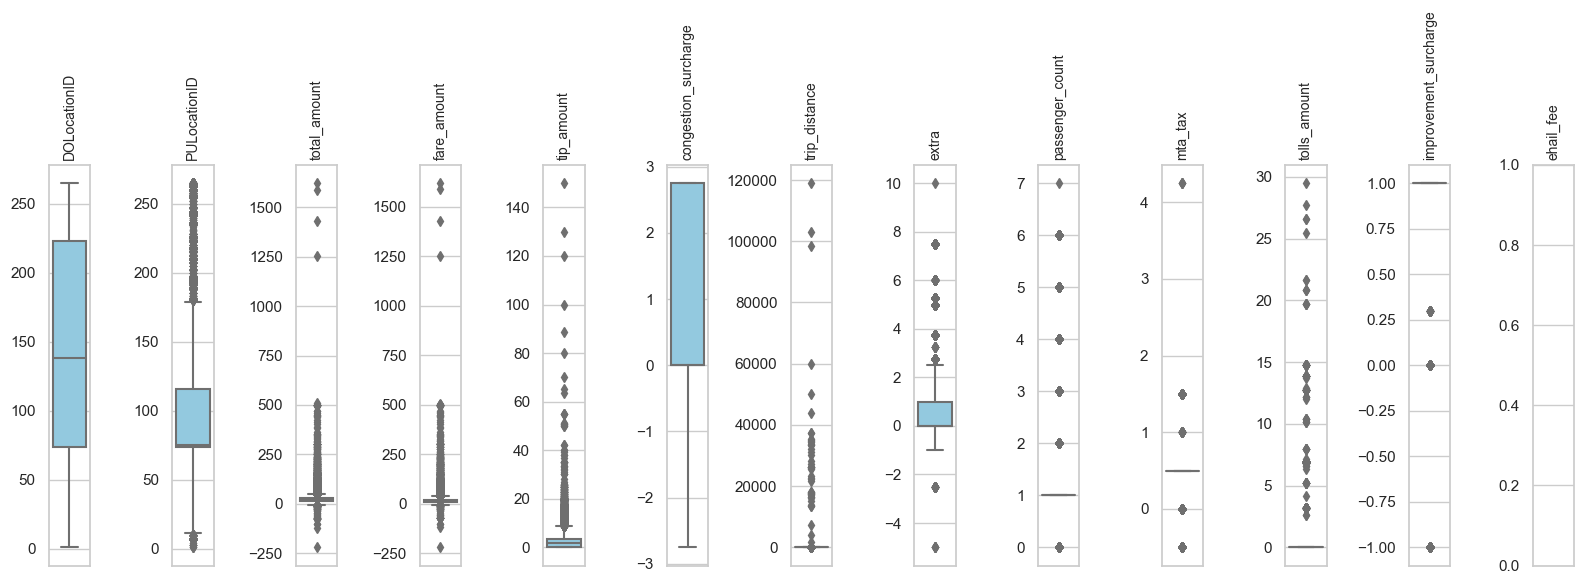

In [7]:
# Selecciona solo las columnas numéricas
df_numerical = Green.select_dtypes(include='number')

# Calcula el IQR (rango intercuartílico) para cada columna y ordénalas por el IQR
iqr_values = (df_numerical.quantile(0.75) - df_numerical.quantile(0.25)).sort_values(ascending=False)
sorted_columns = iqr_values.index

# Ordena las columnas en df_numerical de acuerdo con el orden de iqr_values
df_numerical = df_numerical[sorted_columns]


# Configura el estilo de Seaborn
sns.set(style="whitegrid")

# Tamaño de la figura y espaciado entre subtramas
plt.figure(figsize=(16, 6))
plt.subplots_adjust(wspace=0.4)  # Ajusta el espaciado horizontal entre subtramas

# Crea el gráfico de caja utilizando Seaborn
for i, column in enumerate(sorted_columns):
    ax = plt.subplot(1, len(sorted_columns), i+1)  # Subtrama para cada variable
    sns.boxplot(y=df_numerical[column], color='skyblue', ax=ax)
    ax.set_title(column, rotation=90, fontsize=10)  # Rotar el título y ajustar tamaño de fuente
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(rotation=90)  # Rotar las etiquetas del eje x verticalmente

plt.tight_layout()
plt.show()

### 5. Convertir núemeros negativos a positivos:

In [8]:
# Crear una lista de las columnas en las que deseas convertir los valores negativos a positivos
columnas_a_convertir = ['fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge']

# Aplicar una función lambda a cada valor en cada una de esas columnas para cambiar los valores negativos a positivos
Green[columnas_a_convertir] = Green[columnas_a_convertir].applymap(lambda x: abs(x) if x < 0 else x)

### 6. Eliminar filas con "0" en "fare_amount" o menor a $3:

In [9]:
# Contar el número de filas antes de eliminar
filas_antes = len(Green)

# Eliminar las filas donde 'fare_amount' menor a 3 dólares (tarifa base taxis, $5 la de cancelación uber)
Green = Green[Green['fare_amount'] >= 3]

# Contar el número de filas después de eliminar
filas_despues = len(Green)

# Calcular cuántas filas se eliminaron
filas_eliminadas = filas_antes - filas_despues

print("Se eliminaron {} filas donde 'fare_amount' es menor a 3.".format(filas_eliminadas))


Se eliminaron 73 filas donde 'fare_amount' es menor a 3.


### 7. Imputar valores errados:

In [10]:
# Calcula la moda de 'congestion_surcharge' y 'Airport_fee' excluyendo los valores cero
moda_congestion = Green[Green['congestion_surcharge'] != 0]['congestion_surcharge'].mode()[0]
moda_Improvement = Green[Green['improvement_surcharge'] != 0]['improvement_surcharge'].mode()[0]

# Imputa los valores erróneos utilizando la moda
Green['congestion_surcharge'] = Green['congestion_surcharge'].apply(lambda x: moda_congestion if x > 0 else x)
Green['Airport_fee'] = Green['improvement_surcharge'].apply(lambda x: moda_Improvement if x > 0 else x)


Pendiente imputación Extra hasta revisar horas

### 8. Recuento y eliminación de Outliers:

In [11]:
# Contar cuántos valores en 'base_passenger_fare' superan los 700 dólares
Tarifa_sobre_300 = (Green['fare_amount'] > 300).sum()

# Contar cuántos valores en 'trip_miles' superan las 100 millas
Millas_sobre_100 = (Green['trip_distance'] > 100).sum()

# Contar cuántos valores en 'tolls' superan llos $60 dólares
Peajes_sobre_60 = (Green['tolls_amount'] > 60).sum()

print("Cantidad de valores en 'base_passenger_fare' que superan los $300:", Tarifa_sobre_300)
print("Cantidad de valores en 'trip_miles' superan las 100 millas:", Millas_sobre_100)
print("Cantidad de valores en 'tolls' superan llos $60 dólare:", Peajes_sobre_60)

Cantidad de valores en 'base_passenger_fare' que superan los $300: 47
Cantidad de valores en 'trip_miles' superan las 100 millas: 48
Cantidad de valores en 'tolls' superan llos $60 dólare: 0


### 9. Eliminación de los Outliers:

In [12]:
# Eliminar las filas donde 'base_passenger_fare' supera los $400
Green = Green[Green['fare_amount'] <= 300] # No se considera real una tarifa mayor $150 y se permite que esta se duplique.

# Eliminar las filas donde 'trip_miles' supera las 100 millas
Green = Green[Green['trip_distance'] <= 100] # la distancia máxima sería 50 millas, se puede suponer ida y vuelta

# Eliminar las filas donde 'tolls' supera los $60 dólares
Green = Green[Green['tolls_amount'] <= 60]

### 10. Transformación de los datos de fecha:

In [13]:
Green.columns

Index(['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'PULocationID',
       'DOLocationID', 'passenger_count', 'trip_distance', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'ehail_fee',
       'improvement_surcharge', 'total_amount', 'congestion_surcharge',
       'Airport_fee'],
      dtype='object')

In [14]:
# 1. Crear la columna "time_out" que sea la diferencia entre lpep_pickup_datetime y request_datetime
Green['time_out'] = 0 #En los taxis no hay registro, porque la mayoría son servicion recogidos por parada en la calle

# 2. Crear la columna "travel_time" que sea la diferencia entre dropoff_datetime y lpep_pickup_datetime
Green['travel_time'] = Green['lpep_dropoff_datetime'] - Green['lpep_pickup_datetime']

# 3. Convertir valores negativos en cero
Green['travel_time'] = Green['travel_time'].clip(lower=pd.Timedelta(0))

# 4. Crear las columnas "year", "month", "day", "hour" a partir de la columna lpep_pickup_datetime
Green['year'] = Green['lpep_pickup_datetime'].dt.year
Green['month'] = Green['lpep_pickup_datetime'].dt.month
Green['day'] = Green['lpep_pickup_datetime'].dt.day
Green['hour'] = Green['lpep_pickup_datetime'].dt.hour

# 5. Redondear la columna "hour" al entero más cercano (de 1 a 24)
Green['hour'] = Green['hour'].apply(lambda x: round(x))

# 6. Crear la columna "day_of_week" a partir de la columna lpep_pickup_datetime
Green['day_of_week'] = Green['lpep_pickup_datetime'].dt.day_name()

# 7. Eliminar las columnas lpep_pickup_datetime y dropoff_datetime
Green = Green.drop(columns=['lpep_pickup_datetime', 'lpep_dropoff_datetime'])


### 11. Transformar datos de tarifas:

Primero se imputan y corrigen valores de impuestos fijos según horarios:

In [15]:
# Definir una función para asignar los valores según la columna "hour"
def asignar_valor(row):
    if (row['hour'] >= 16 and row['hour'] <= 24) or (row['hour'] <= 6):
        return 1.5 if (row['hour'] >= 16 and row['hour'] <= 20) else 0.5
    else:
        return 0

# Aplicar la función a la columna extra
Green['extra'] = Green.apply(asignar_valor, axis=1)


Luego se unifican tarifa base y extras:

In [16]:
# Crear la columna "fare_surcharges" que sea la suma de tolls, mta_tax, congestion_surcharge, airport_fee
Green['fare_surcharges'] = Green['tolls_amount'] + Green['extra'] + Green['congestion_surcharge'] + Green['Airport_fee']

# Crear la columna "base_fare" que sea la suma de base_passenger_fare y sales_tax
Green['base_fare'] = Green['fare_amount'] + 0.8 # 0.5 MTA + 0.3 Improvement

# Eliminar las columnas de tarifas individuales
columnas_eliminar = ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'congestion_surcharge']
Green = Green.drop(columns=columnas_eliminar)

### 12. Cambiar formato de tiempos de viaje y espera:

In [17]:
# Convertir los datos de timedelta64[us] a minutos y luego a un entero
Green['travel_time_minutes'] = Green['travel_time'] / pd.Timedelta(minutes=1)

# Convertir a entero
Green['travel_time_minutes'] = Green['travel_time_minutes'].astype(int)

# Convertir a entero de 32 bits
Green['time_out'] = Green['time_out'].astype('int32')
Green['travel_time'] = Green['travel_time_minutes'].astype('int32')

Green = Green.drop(columns=['travel_time_minutes'])

### 13. Verificar Outliers en tiempo de servicio:

In [18]:
# Servicios que superan 4 horas de trayecto
Servicio_sobre_4_hrs = (Green['travel_time'] > 240).sum()

print("Servicios que superan 4 horas de trayecto:", Servicio_sobre_4_hrs)

Servicios que superan 4 horas de trayecto: 276


In [19]:
# Eliminar los registros donde el tiempo de trayecto supera las 4 horas (240 minutos)
Green =Green[Green['travel_time'] <= 240]

se deja especificado que igual deben elimnarse de existir.

### 14. Revisar variación de Outliers:

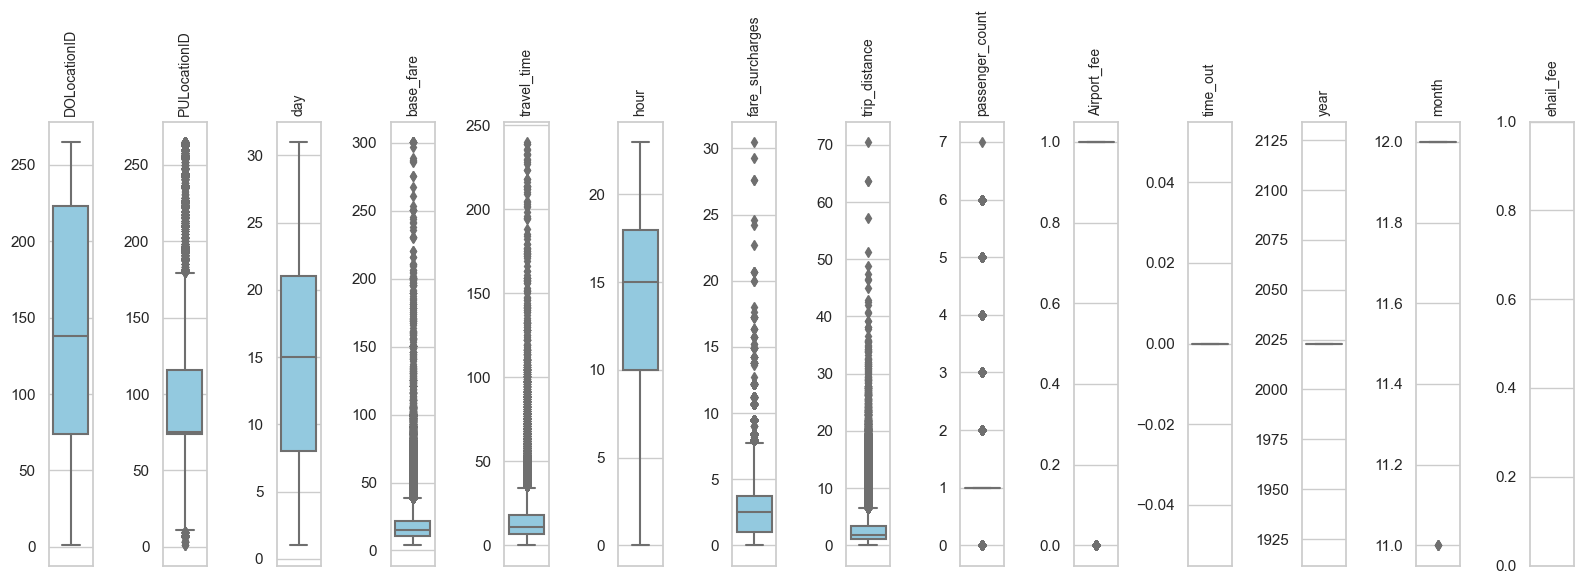

In [20]:
# Selecciona solo las columnas numéricas
df_numerical = Green.select_dtypes(include='number')

# Calcula el IQR (rango intercuartílico) para cada columna y ordénalas por el IQR
iqr_values = (df_numerical.quantile(0.75) - df_numerical.quantile(0.25)).sort_values(ascending=False)
sorted_columns = iqr_values.index

# Ordena las columnas en df_numerical de acuerdo con el orden de iqr_values
df_numerical = df_numerical[sorted_columns]


# Configura el estilo de Seaborn
sns.set(style="whitegrid")

# Tamaño de la figura y espaciado entre subtramas
plt.figure(figsize=(16, 6))
plt.subplots_adjust(wspace=0.4)  # Ajusta el espaciado horizontal entre subtramas

# Crea el gráfico de caja utilizando Seaborn
for i, column in enumerate(sorted_columns):
    ax = plt.subplot(1, len(sorted_columns), i+1)  # Subtrama para cada variable
    sns.boxplot(y=df_numerical[column], color='skyblue', ax=ax)
    ax.set_title(column, rotation=90, fontsize=10)  # Rotar el título y ajustar tamaño de fuente
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(rotation=90)  # Rotar las etiquetas del eje x verticalmente

plt.tight_layout()
plt.show()

In [21]:
# Servicios que superan 4 horas de trayecto
moda_Año = Green[Green['year'] != 0]['year'].mode()[0]
moda_Mes = Green[Green['month'] != 0]['month'].mode()[0]

Año_diferente = (Green['year'] != moda_Año).sum()
Mes_diferente = (Green['month'] != moda_Mes).sum()

print('No. Registros con Año diferente: ',Año_diferente)
print('No. Registros con Mes diferente: ',Mes_diferente)

Green['year'] = Green['year'].apply(lambda x: moda_Año if x > 0 else x)
Green['month'] = Green['month'].apply(lambda x: moda_Mes if x > 0 else x)

No. Registros con Año diferente:  0
No. Registros con Mes diferente:  4


### 15. Agragar columnas auxiliares para definir nuevos outliers:

In [22]:
# Filtrar los registros donde trip_distance es cero y asignar un valor NaN
Green['$mile'] = np.where(Green['trip_distance'] != 0, Green['base_fare'] / Green['trip_distance'], np.nan)

# Filtrar los registros donde trip_minutes es cero y asignar un valor NaN
Green['$minute'] = np.where(Green['travel_time'] != 0, Green['base_fare'] / Green['travel_time'], np.nan)

Revisar porcentaje de elinnación de registros:

In [23]:
Total_Servicios_Sin_Outliers_extremos=len(Green)
Total_Servicios_Sin_Outliers_extremos

print("Porcentaje de eliminación en este punto:",round((Total_Registros_inicial-Total_Servicios_Sin_Outliers_extremos)/
                                                       Total_Registros_inicial,4)*100)

Porcentaje de eliminación en este punto: 0.69


### 16. Eliminar Outliers basado en rangos intercurtílicos:

In [24]:
# Calcular los cuartiles
Q1_mile = Green['$mile'].quantile(0.25)
Q3_mile = Green['$mile'].quantile(0.75)
IQR_mile = Q3_mile - Q1_mile

Q1_minute = Green['$minute'].quantile(0.25)
Q3_minute = Green['$minute'].quantile(0.75)
IQR_minute = Q3_minute - Q1_minute

# Multiplicador para rango intercuartílico:
multiplicador = 2

# Definir los límites superior e inferior
umbral_inf_mile = Q1_mile - multiplicador * IQR_mile
umbral_sup_mile = Q3_mile + multiplicador * IQR_mile

umbral_inf_minute =  Q3_minute - multiplicador * IQR_minute # para evitar borrar todos los registros
umbral_sup_minute = Q3_minute + multiplicador * IQR_minute

# Filtrar los registros que caen dentro del rango intercuartílico para cada columna
Green_filtrado = Green[
    (Green['$mile'] >= umbral_inf_mile) & (Green['$mile'] <= umbral_sup_mile) &
    (Green['$minute'] >= umbral_inf_minute) & (Green['$minute'] <= umbral_sup_minute)
]

# Calcular el promedio para las columnas filtradas
promedio_cost_mile_filtrado = Green_filtrado['$mile'].mean()
promedio_cost_minute_filtrado = Green_filtrado['$minute'].mean()

# Imprimir los resultados
print("Promedio de $/milla sin datos atípicos:", promedio_cost_mile_filtrado)
print("Promedio de $/minuto sin datos atípicos:", promedio_cost_minute_filtrado)


Promedio de $/milla sin datos atípicos: 7.403147853701234
Promedio de $/minuto sin datos atípicos: 1.3493982288801971


In [25]:
# Número de servicios con $mile sobre el umbral:
Cost_mile_sobre_umbral = (Green['$mile'] > umbral_sup_mile ).sum()

# Número de servicios con $time sobre el umbral:
Cost_minute_sobre_umbral = (Green['$minute'] > umbral_sup_minute).sum()

print(f'el número de registros sobre el umbral de $/milla es: {Cost_mile_sobre_umbral}')
print(f'el número de registros sobre el umbral de $/minuto es: {Cost_minute_sobre_umbral}')

el número de registros sobre el umbral de $/milla es: 2508
el número de registros sobre el umbral de $/minuto es: 2446


Verificar nivel de elimnación:

In [26]:
Total_servicios_Final=len(Green_filtrado)

print("Porcentaje de eliminación en este punto:",round((Total_Registros_inicial-Total_servicios_Final)/
                                                       Total_Registros_inicial,4)*100)

Porcentaje de eliminación en este punto: 12.41


### 17. Eliminar datos con ubicaciones no definidas:

In [27]:
# Número de servicios con ubicación de recogida o llegada desconocido:
DO_location_264 = (Green_filtrado['DOLocationID'] == 264).sum()
DO_location_265 = (Green_filtrado['DOLocationID'] == 265).sum()
PU_location_264 = (Green_filtrado['PULocationID'] == 264).sum()
PU_location_265 = (Green_filtrado['PULocationID'] == 265).sum()

print('registros con ubicación DO 264 (NV): ',DO_location_264)
print('registros con ubicación DO 265 (NA): ',DO_location_265)
print('registros con ubicación PU 264 (NV): ',PU_location_264)
print('registros con ubicación PU 265 (NA): ',PU_location_265)

print('Total: ',PU_location_265+PU_location_264+DO_location_265+DO_location_264)

registros con ubicación DO 264 (NV):  69
registros con ubicación DO 265 (NA):  165
registros con ubicación PU 264 (NV):  13
registros con ubicación PU 265 (NA):  22
Total:  269


Eliminar registros:

In [28]:
# Eliminar los registros con DOLocationID igual a 264
Green_filtrado = Green_filtrado.loc[Green_filtrado['DOLocationID'] != 264]

# Eliminar los registros con DOLocationID igual a 265
Green_filtrado = Green_filtrado.loc[Green_filtrado['DOLocationID'] != 265]

# Eliminar los registros con PULocationID igual a 264
Green_filtrado = Green_filtrado.loc[Green_filtrado['PULocationID'] != 264]

# Eliminar los registros con PULocationID igual a 265
Green_filtrado = Green_filtrado.loc[Green_filtrado['PULocationID'] != 265]


Revisar nivel de elimanción:

In [29]:
Total_servicios_Final=len(Green_filtrado)

print("Porcentaje de eliminación en este punto:",round((Total_Registros_inicial-Total_servicios_Final)/
                                                       Total_Registros_inicial,4)*100)

Porcentaje de eliminación en este punto: 12.809999999999999


### 18. Realizar agregaciones:

In [30]:
# Crear la columna "service_number" y asignar el valor 1 a todas las filas
Green_filtrado['service_number'] = 1

# Crear la columna "service_Type" y asignar el valor Green a todas las filas
Green_filtrado['service_type'] = 'Green'

# 
Green_filtrado.rename(columns={'trip_distance': 'trip_miles'}, inplace=True)


# Definir las dimensiones de agrupación y las variables de agregación
dimensiones = ['service_type','year', 'month', 'day', 'day_of_week','hour', 'PULocationID', 'DOLocationID']
variables_agregacion = ['trip_miles', 'time_out', 'travel_time', 'fare_surcharges', 'base_fare', 'service_number']

# Agrupar el DataFrame y calcular la suma de las variables de agregación
Green_agrupado = Green_filtrado.groupby(dimensiones)[variables_agregacion].sum().reset_index()

In [31]:
Green_agrupado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43642 entries, 0 to 43641
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   service_type     43642 non-null  object 
 1   year             43642 non-null  int32  
 2   month            43642 non-null  int32  
 3   day              43642 non-null  int32  
 4   day_of_week      43642 non-null  object 
 5   hour             43642 non-null  int64  
 6   PULocationID     43642 non-null  int32  
 7   DOLocationID     43642 non-null  int32  
 8   trip_miles       43642 non-null  float64
 9   time_out         43642 non-null  int32  
 10  travel_time      43642 non-null  int32  
 11  fare_surcharges  43642 non-null  float64
 12  base_fare        43642 non-null  float64
 13  service_number   43642 non-null  int64  
dtypes: float64(3), int32(7), int64(2), object(2)
memory usage: 3.5+ MB


### 19. Exportar archivo a parquet:

In [32]:
Green_agrupado.to_parquet('../DataClean/Green_Agrupado.parquet')

In [33]:
Green_agrupado.describe()

,year,month,day,hour,PULocationID,DOLocationID,trip_miles,time_out,travel_time,fare_surcharges,base_fare,service_number
count,43642.0,43642.0,43642.000000,43642.000000,43642.000000,43642.000000,43642.000000,43642.0,43642.000000,43642.000000,43642.000000,43642.00000
mean,2023.0,12.0,15.038312,14.042642,98.148343,140.203405,3.889065,0.0,19.527313,3.086498,23.912393,1.28287
std,0.0,0.0,8.590237,5.426558,60.543485,75.488412,3.645773,0.0,17.105147,3.185060,18.115105,0.87112
min,2023.0,12.0,1.000000,0.000000,3.000000,1.000000,0.390000,0.0,2.000000,0.000000,4.500000,1.00000
25%,2023.0,12.0,8.000000,11.000000,66.000000,74.000000,1.610000,0.0,9.000000,1.000000,12.900000,1.00000
50%,2023.0,12.0,15.000000,15.000000,75.000000,140.000000,2.740000,0.0,15.000000,2.500000,18.500000,1.00000
75%,2023.0,12.0,22.000000,18.000000,129.000000,216.000000,4.840000,0.0,24.000000,3.750000,29.300000,1.00000
max,2023.0,12.0,31.000000,23.000000,263.000000,263.000000,54.160000,0.0,372.000000,42.000000,329.600000,19.00000
